In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read data
data = pd.read_excel(r"C:\Users\marcu\OneDrive\Documents\GitHub\termo-lab\Det absolutte nulpunkt\Datafiler\temperaturogtryk.xlsx")

display(data.head())

T = data.iloc[:,0].tolist()
T = [t + 273.15 for t in T]

P = data.iloc[:,1].tolist()

T_icebath = np.mean([T[0], T[2], T[4]])
T_boiling = np.mean([T[1], T[3], T[5]])

P_icebath = np.mean([P[0], P[2], P[4]])
P_boiling = np.mean([P[1], P[3], P[5]])

# Uncertainties
dT = np.mean([np.std([T[0], T[2], T[4]]), np.std([T[1], T[3], T[5]])])
dP = np.mean([np.std([P[0], P[2], P[4]]), np.std([P[1], P[3], P[5]])])

print(f"Uncertainty in T: {dT} C")
print(f"Uncertainty in P: {dP} kPa")





,T [C],P [kPa]
0,1.6,94.603
1,98.0,115.907
2,3.9,95.045
3,97.5,115.970
4,1.6,94.792


Uncertainty in T: 0.7071067811865389 C
Uncertainty in P: 0.10538683435188675 kPa


Linear regression and calibration line

In [56]:
# 1. fit
linear = lambda x, a, b: a*x + b
popt, pcov = curve_fit(linear, P, T, sigma=[dT]*len(T), absolute_sigma=True)
a, b = popt
da, db = np.sqrt(np.diag(pcov))

dT_from_dP = a*dP
dT = np.sqrt(dT_from_dP + da*dP)




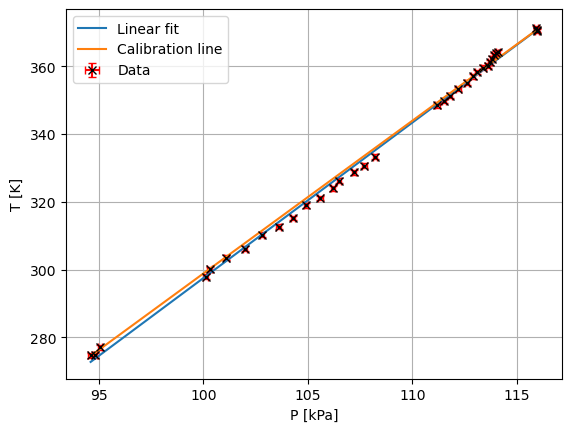

Absolute zero according to fit: -160.8 +/- 3.9 K
Absolute zero according to calibration line: -151.5 K


In [55]:


# Calibration line
a_cal = (T_boiling - T_icebath)/(P_boiling - P_icebath)
cal_line = lambda x: a_cal*(x-P_icebath) + T_icebath

X = np.linspace(min([P_icebath, P[0]]), max([P_boiling, P[-1]]), 100000)

# Plot
plt.figure()
plt.errorbar(P, T, xerr=dP, yerr=dT, fmt='x', label="Data", color='black', ecolor='red', capsize=3)
plt.plot(X, linear(X, a, b), label=f"Linear fit")
plt.plot(X, cal_line(X), label=f"Calibration line")
plt.xlabel("P [kPa]")
plt.ylabel("T [K]")
plt.legend()
plt.grid()
plt.show()

print("Absolute zero according to fit: {:.1f} +/- {:.1f} K".format(b, db))
print("Absolute zero according to calibration line: {:.1f} K".format(cal_line(0)))


In [51]:
# Parameters and uncertainty
print(a, b)
print(da, db)

4.583443852434167 -160.81362339212728
0.03622520017035554 3.921768812414968
